In [13]:
import numpy as np
from keras.models import load_model
from sklearn.model_selection import KFold
from time import time
from timeit import default_timer as timer
import pickle


Using TensorFlow backend.


In [14]:
windowSize = 19
predictionIndex = 9
classSize = 8  # 2 or 3 
numberOfFeatures = 50 #44 

amino_acid_residues = 21
num_classes = 8

In [15]:

# returns a compiled model
# identical to the previous one
model = load_model('model_kfold1.h5')

OSError: Unable to open file (unable to open file: name = 'model_kfold1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
dataset = np.load('all_dataset_window19Middle.npy') 

In [5]:
print(dataset.shape)
print(dataset[0,:,21:29])
print(dataset[0,:,21:29].shape)

(1133502, 19, 50)
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]
(19, 8)


In [6]:
a =  model.predict(dataset[:, :, 0:21])

In [7]:
print(a.shape)
print(a[0,:,])

(1133502, 19, 8)
[[7.53434822e-02 4.97409608e-03 9.96394902e-02 2.38047261e-02
  8.01533344e-04 6.72847927e-01 4.28503864e-02 7.97383934e-02]
 [6.95024729e-02 3.88632552e-03 8.15614089e-02 1.86982881e-02
  6.09291892e-04 7.20996559e-01 3.86800393e-02 6.60656244e-02]
 [5.99082261e-02 3.95707507e-03 8.93010199e-02 2.26284936e-02
  7.89089943e-04 7.10772574e-01 3.55571173e-02 7.70864189e-02]
 [5.90473302e-02 3.63201648e-03 7.33941048e-02 2.28047129e-02
  8.23848008e-04 6.97038054e-01 4.12727371e-02 1.01987228e-01]
 [4.82028462e-02 3.63945519e-03 7.97896460e-02 2.39430740e-02
  1.23018655e-03 6.98528588e-01 3.48704457e-02 1.09795794e-01]
 [4.51173112e-02 3.51180183e-03 8.27293023e-02 2.35607438e-02
  1.41648843e-03 7.11833775e-01 3.34993191e-02 9.83312577e-02]
 [5.42930253e-02 3.65253654e-03 9.11904797e-02 2.49031950e-02
  1.20517099e-03 6.80434883e-01 4.05272506e-02 1.03793457e-01]
 [5.43417372e-02 3.30252061e-03 9.69693959e-02 2.72753332e-02
  1.00671069e-03 6.78423464e-01 4.07269187e-02

In [ ]:
test = a[0,:,]
for k in range (500):
    test = a[k,:,] 
    lista = []
    for i in range(8):
        lista.append(np.argmax(test[i]))
    print(all(x == lista[0] for x in lista))    

In [9]:
hist = a.flatten()
print(hist.shape)
print(hist[0:10])

(172292304,)
[0.07534348 0.0049741  0.09963949 0.02380473 0.00080153 0.6728479
 0.04285039 0.07973839 0.06950247 0.00388633]


Text(0, 0.5, 'Count')

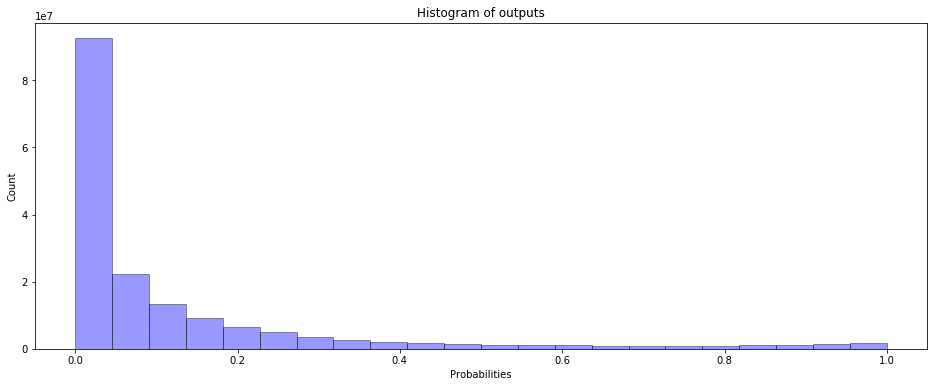

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
# seaborn histogram
sns.distplot(hist, hist=True, kde=False,  bins=int(180/8), color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Histogram of outputs')
plt.xlabel('Probabilities')
plt.ylabel('Count')

In [19]:
import os
arr = os.listdir()
print(arr)


['.ipynb_checkpoints', 'all_dataset_window19Middle.npy', 'bigModelHistograms.ipynb', 'kfold.ipynb', 'model_kfold1(old).h5', 'model_scores_kfold1']


In [12]:
import pickle
m1H = pickle.load( open( "model_history_kfold1", "rb" ) )
print(m1H)

[array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])
 array([ 3, 14, 19, 37, 38, 41, 43, 66, 68, 79])]


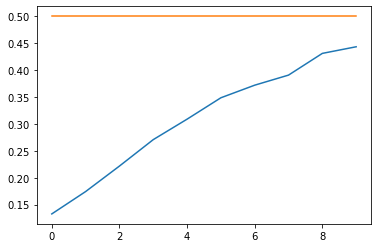

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(m1H['accuracy'])
plt.plot(m1H['val_accuracy'])